---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    train.csv - the training set (all tickets issued 2004-2011)
    test.csv - the test set (all tickets issued 2012-2016)
    addresses.csv & latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def blight_model():
    
    # Your code here
    
    return # Your answer here

In [53]:
df_whole = pd.read_csv('train.csv', encoding = "ISO-8859-1")

C:\Users\Tola\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
df_whole.shape

(250306, 34)

In [55]:
features_not_in_train = ['payment_amount', 'payment_date', 'payment_status',
'balance_due',
'collection_status', 
'compliance_detail']

In [56]:
#df[df.columns.difference(features_not_in_train)] possible, but returns columns in alphabetical order
dfe = df_whole.drop(features_not_in_train, axis = 1)

#drop the columns, which are not to be included in training of the model
dfe.shape

(250306, 28)

In [57]:
# change target column value from nan to 2 --> Classification with 3 classes 0 - not paid, 1 - paid, 2 - not resposible
#df.compliance[df['compliance'].isna()] = 2 #--> Evaluation aof Assignment has to be done with AOC, so change data set to binary classification

df = dfe[dfe.compliance.notna()] # drop rows, where compliance is NaN

#print count of labeld target values
for i in range(2):
    print (str(i) + ':' + str(np.bincount(df.compliance)[i]))


0:148283
1:11597


In [58]:
pd.options.display.max_columns = None # to understand all column values
df.describe(include = 'all');

In [59]:
adr = pd.read_csv('addresses.csv')
lat = pd.read_csv('latlons.csv')

In [60]:
adr.shape, lat.shape

((311307, 2), (121769, 3))

In [61]:
lat.head(), lat.shape

(                                  address        lat        lon
 0  4300 rosa parks blvd, Detroit MI 48208  42.346169 -83.079962
 1                14512 sussex, Detroit MI  42.394657 -83.194265
 2                3456 garland, Detroit MI  42.373779 -82.986228
 3                5787 wayburn, Detroit MI  42.403342 -82.957805
 4              5766 haverhill, Detroit MI  42.407255 -82.946295,
 (121769, 3))

In [62]:
adr.head(), adr.shape

(   ticket_id                      address
 0      22056       2900 tyler, Detroit MI
 1      27586     4311 central, Detroit MI
 2      22062  1449 longfellow, Detroit MI
 3      22084  1441 longfellow, Detroit MI
 4      22093   2449 churchill, Detroit MI,
 (311307, 2))

In [63]:
adresses = adr.merge(lat, how = 'inner', left_on = 'address', right_on = 'address' )
adresses.isna().sum() # to check how many Nan there is
adresses.dropna(inplace = True)
adresses.head()

,ticket_id,address,lat,lon
0,22056,"2900 tyler, Detroit MI",42.390729,-83.124268
1,77242,"2900 tyler, Detroit MI",42.390729,-83.124268
2,77243,"2900 tyler, Detroit MI",42.390729,-83.124268
3,103945,"2900 tyler, Detroit MI",42.390729,-83.124268
4,138219,"2900 tyler, Detroit MI",42.390729,-83.124268


In [64]:
dff = df.merge(adresses, how = 'inner', left_on = 'ticket_id', right_on = 'ticket_id')
dff.describe()

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance,lat,lon
count,159878.000000,1.598780e+05,0.0,1.573200e+05,159878.000000,159878.0,159878.0,159878.000000,159878.000000,159878.0,159878.000000,159878.000000,159878.000000,159878.000000
mean,150453.782328,1.071316e+04,NaN,9.133826e+03,357.037885,20.0,10.0,33.651746,0.195962,0.0,420.653040,0.072537,42.389747,-83.111530
std,77224.766947,3.623179e+04,NaN,3.657751e+04,675.659316,0.0,0.0,67.693299,4.290370,0.0,742.559176,0.259375,0.037120,0.093515
min,18645.000000,0.000000e+00,NaN,1.000000e+00,0.000000,20.0,10.0,0.000000,0.000000,0.0,0.000000,0.000000,42.145257,-84.403766
25%,83370.250000,4.920000e+03,NaN,5.320000e+02,200.000000,20.0,10.0,10.000000,0.000000,0.0,250.000000,0.000000,42.364536,-83.185854
50%,149777.500000,1.039800e+04,NaN,2.418000e+03,250.000000,20.0,10.0,25.000000,0.000000,0.0,305.000000,0.000000,42.392575,-83.124521
75%,217479.750000,1.578275e+04,NaN,1.284400e+04,250.000000,20.0,10.0,25.000000,0.000000,0.0,305.000000,0.000000,42.419160,-83.033202
max,299363.000000,1.415411e+07,NaN,5.111345e+06,10000.000000,20.0,10.0,1000.000000,350.000000,0.0,11030.000000,1.000000,44.785389,-82.512936


In [98]:
features_no_value = [ 'admin_fee', 'state_fee', 'clean_up_cost', 'address', 'grafitti_status', 'violation_description', 'violation_zip_code', 'mailing_address_str_number', 'mailing_address_str_name', 'city', 'state', 'zip_code', 'non_us_str_code', 'country']
data = dff.drop(features_no_value, axis = 1)
data.set_index('ticket_id', inplace = True);

In [99]:
data.describe(include = 'all')


,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,ticket_issued_date,hearing_date,violation_code,disposition,fine_amount,late_fee,discount_amount,judgment_amount,compliance,lat,lon
count,159878,159878,159852,1.598780e+05,159878,159878,159651,159878,159878,159878.000000,159878.000000,159878.000000,159878.000000,159878.000000,159878.000000,159878.000000
unique,5,159,84655,NaN,1715,68096,5970,189,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Buildings, Safety Engineering & Env Department","Morris, John","INVESTMENT, ACORN",NaN,SEVEN MILE,2007-12-21 09:00:00,2005-12-20 09:00:00,9-1-36(a),Responsible by Default,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95862,11604,624,NaN,2373,60,590,64413,138338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.071316e+04,NaN,NaN,NaN,NaN,NaN,357.037885,33.651746,0.195962,420.653040,0.072537,42.389747,-83.111530
std,NaN,NaN,NaN,3.623179e+04,NaN,NaN,NaN,NaN,NaN,675.659316,67.693299,4.290370,742.559176,0.259375,0.037120,0.093515
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,42.145257,-84.403766
25%,NaN,NaN,NaN,4.920000e+03,NaN,NaN,NaN,NaN,NaN,200.000000,10.000000,0.000000,250.000000,0.000000,42.364536,-83.185854
50%,NaN,NaN,NaN,1.039800e+04,NaN,NaN,NaN,NaN,NaN,250.000000,25.000000,0.000000,305.000000,0.000000,42.392575,-83.124521
75%,NaN,NaN,NaN,1.578275e+04,NaN,NaN,NaN,NaN,NaN,250.000000,25.000000,0.000000,305.000000,0.000000,42.419160,-83.033202


In [100]:
data['disposition_category'] = data.disposition.astype('category').cat.codes 
data['violation_category'] = data.violation_code.astype('category').cat.codes


In [101]:
dat = data.iloc[:, 9:].dropna() # this data to use for training, whithout other columns, with personal information, etc. and without Nan
dat

,fine_amount,late_fee,discount_amount,judgment_amount,compliance,lat,lon,disposition_category,violation_category
ticket_id,,,,,,,,,
22056,250.0,25.0,0.0,305.0,0.0,42.390729,-83.124268,2,143
27586,750.0,75.0,0.0,855.0,1.0,42.326937,-83.135118,3,74
22046,250.0,25.0,0.0,305.0,0.0,42.145257,-83.208233,2,143
18738,750.0,75.0,0.0,855.0,0.0,42.433466,-83.023493,2,73
18735,100.0,10.0,0.0,140.0,0.0,42.388641,-83.037858,2,72
...,...,...,...,...,...,...,...,...,...
285106,200.0,20.0,0.0,250.0,0.0,42.440228,-83.154829,2,47
284650,1000.0,100.0,0.0,1130.0,0.0,42.406293,-83.171850,2,47
285125,500.0,50.0,0.0,580.0,0.0,42.366529,-83.141897,2,47


In [75]:
dat.corr()

,fine_amount,late_fee,discount_amount,judgment_amount,compliance,lat,lon,disposition_category,violation_category
fine_amount,1.000000,0.986787,0.039495,0.999890,-0.049135,-0.002891,-0.024070,0.067056,-0.236720
late_fee,0.986787,1.000000,-0.022706,0.989070,-0.085056,0.000514,-0.022727,0.122552,-0.231690
discount_amount,0.039495,-0.022706,1.000000,0.033869,0.156073,0.000261,-0.006432,-0.088130,-0.012820
judgment_amount,0.999890,0.989070,0.033869,1.000000,-0.052639,-0.002592,-0.023963,0.072448,-0.236467
compliance,-0.049135,-0.085056,0.156073,-0.052639,1.000000,-0.021569,-0.000431,-0.087468,-0.055039
lat,-0.002891,0.000514,0.000261,-0.002592,-0.021569,1.000000,0.175336,0.017323,-0.064631
lon,-0.024070,-0.022727,-0.006432,-0.023963,-0.000431,0.175336,1.000000,0.015207,0.039322
disposition_category,0.067056,0.122552,-0.088130,0.072448,-0.087468,0.017323,0.015207,1.000000,-0.018809
violation_category,-0.236720,-0.231690,-0.012820,-0.236467,-0.055039,-0.064631,0.039322,-0.018809,1.000000


In [102]:
y = dat['compliance']
targets = ['fine not paid', 'fine paid']
X = dat.drop(['compliance'], axis = 1)
X.shape, y.shape
X.describe()

,fine_amount,late_fee,discount_amount,judgment_amount,lat,lon,disposition_category,violation_category
count,159878.000000,159878.000000,159878.000000,159878.000000,159878.000000,159878.000000,159878.000000,159878.000000
mean,357.037885,33.651746,0.195962,420.653040,42.389747,-83.111530,1.959676,113.831102
std,675.659316,67.693299,4.290370,742.559176,0.037120,0.093515,0.369813,51.214052
min,0.000000,0.000000,0.000000,0.000000,42.145257,-84.403766,0.000000,0.000000
25%,200.000000,10.000000,0.000000,250.000000,42.364536,-83.185854,2.000000,91.000000
50%,250.000000,25.000000,0.000000,305.000000,42.392575,-83.124521,2.000000,143.000000
75%,250.000000,25.000000,0.000000,305.000000,42.419160,-83.033202,2.000000,143.000000
max,10000.000000,1000.000000,350.000000,11030.000000,44.785389,-82.512936,3.000000,188.000000


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X_train.describe()
y_test

ticket_id
207361    0.0
238936    0.0
170434    0.0
245126    0.0
283677    0.0
         ... 
71684     0.0
225295    0.0
232524    0.0
188700    0.0
184015    0.0
Name: compliance, Length: 52760, dtype: float64

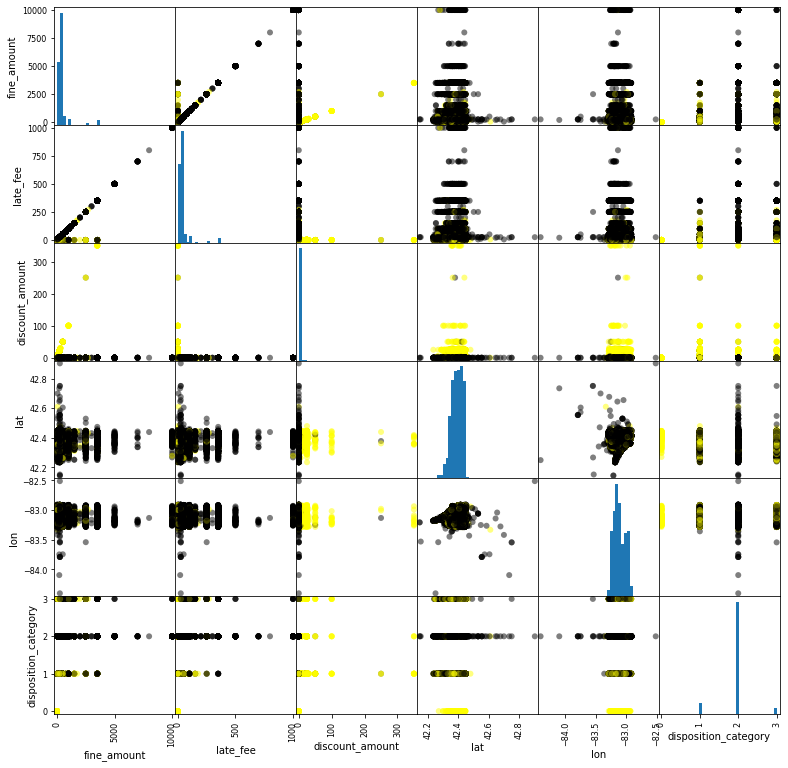

In [24]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')

scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', cmap = cmap, figsize = (13,13), hist_kwds={'bins':40})

In [35]:
pd.DataFrame(X_train_scaled, columns = list(X_train.columns)) #to dataframe, to plot scatter_matrix

,fine_amount,late_fee,discount_amount,lat,lon,disposition_category
0,0.100,0.100,0.0,0.347592,0.712341,0.666667
1,0.005,0.005,0.0,0.343732,0.679578,0.666667
2,0.025,0.000,0.0,0.309630,0.745150,0.333333
3,0.025,0.025,0.0,0.327132,0.732375,0.666667
4,0.025,0.025,0.0,0.297818,0.618354,0.666667
...,...,...,...,...,...,...
107113,0.025,0.025,0.0,0.207761,0.679332,0.666667
107114,0.025,0.025,0.0,0.387226,0.692691,0.666667
107115,0.025,0.025,0.0,0.320760,0.608331,0.666667
107116,0.025,0.025,0.0,0.299935,0.649753,0.666667


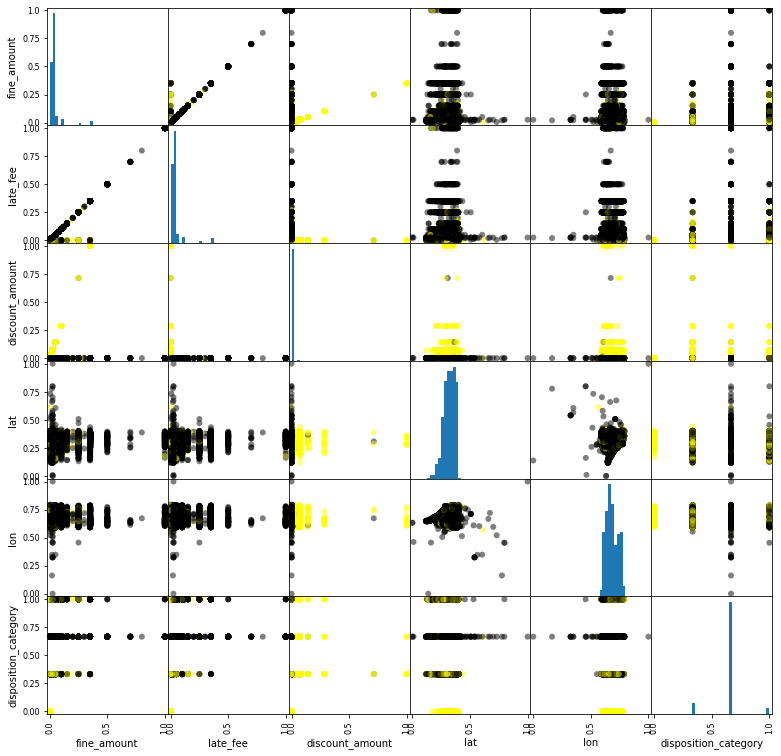

In [36]:
scatter = pd.plotting.scatter_matrix(pd.DataFrame(X_train_scaled, columns = list(X_train.columns)), c = y_train, marker = 'o', cmap = cmap, figsize = (13,13), hist_kwds={'bins':40})

## Dummy Classifier for comparison

In [78]:
def generate_report(y_prediction, classifier):
    print(classification_report(y_test, y_prediction, target_names = targets ) )
    print(confusion_matrix(y_test, y_prediction))
    
    fpr, tpr, _ = roc_curve(y_test, y_prediction) #ROC curve
    roc_auc = auc(fpr, tpr) # Area ROC curve
    plt.plot(fpr, tpr, lw=3, label='{} ROC curve (area = {:0.2f})'.format(classifier, roc_auc))
    plt.legend(loc='lower right', fontsize=13)
    print('area under ROC curve is: ', roc_auc)
    return None

In [40]:
dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train) # dummy classifier for comparison
y_dummy_predict = dummy_clf.predict(X_test)

C:\Users\Tola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

fine not paid       0.93      1.00      0.96     48938
    fine paid       0.00      0.00      0.00      3822

     accuracy                           0.93     52760
    macro avg       0.46      0.50      0.48     52760
 weighted avg       0.86      0.93      0.89     52760

[[48938     0]
 [ 3822     0]]
area under ROC curve is:  0.5


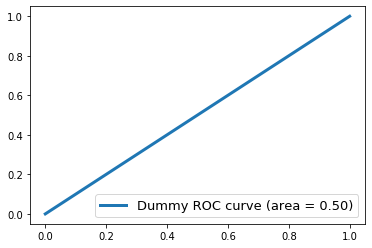

In [41]:
generate_report(y_dummy_predict, 'Dummy')

## KNearestNeighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)

               precision    recall  f1-score   support

fine not paid       0.94      0.99      0.97     48938
    fine paid       0.71      0.26      0.38      3822

     accuracy                           0.94     52760
    macro avg       0.83      0.62      0.67     52760
 weighted avg       0.93      0.94      0.92     52760

[[48542   396]
 [ 2847   975]]
area under ROC curve is:  0.6235050847344537


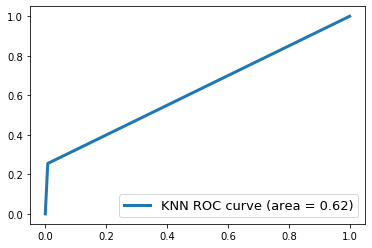

In [80]:
generate_report(y_predict_knn, 'KNN')

## Knearest Neighbor with Normalized Data

               precision    recall  f1-score   support

fine not paid       0.94      0.99      0.97     48938
    fine paid       0.69      0.25      0.37      3822

     accuracy                           0.94     52760
    macro avg       0.82      0.62      0.67     52760
 weighted avg       0.93      0.94      0.92     52760

[[48505   433]
 [ 2851   971]]
area under ROC curve is:  0.6226037691536311


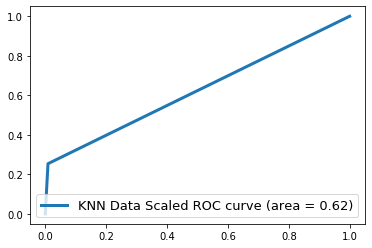

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_scl = KNeighborsClassifier(n_neighbors = 2).fit(X_train_scaled, y_train)
y_predict_knn_scl = knn_scl.predict(X_test_scaled)
generate_report(y_predict_knn_scl, 'KNN Data Scaled')

## RBF SVC

In [148]:
#from sklearn.svm import SVC

#svm_rbf = SVC(kernel = 'rbf').fit(X_train, y_train)

In [149]:
#y_predict_svm_rbf = svm_rbf.predict(X_test)

               precision    recall  f1-score   support

fine not paid       0.93      1.00      0.96     48938
    fine paid       0.95      0.06      0.11      3822

     accuracy                           0.93     52760
    macro avg       0.94      0.53      0.54     52760
 weighted avg       0.93      0.93      0.90     52760

[[48926    12]
 [ 3602   220]]
area under ROC curve is:  0.5286581389551328


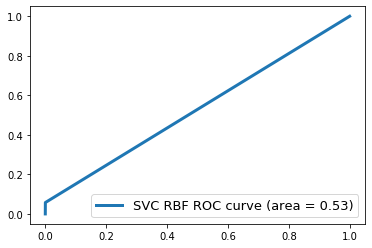

In [150]:
#generate_report(y_predict_svm_rbf, 'SVC RBF')

## SVC with low gamma

               precision    recall  f1-score   support

fine not paid       0.94      1.00      0.97     48938
    fine paid       0.91      0.25      0.39      3822

     accuracy                           0.94     52760
    macro avg       0.93      0.62      0.68     52760
 weighted avg       0.94      0.94      0.93     52760

[[48840    98]
 [ 2866   956]]
area under ROC curve is:  0.6240641438705461


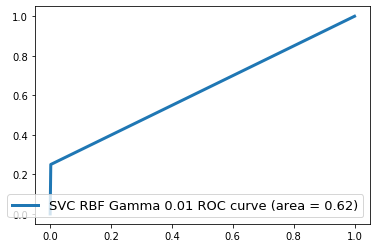

In [153]:
#svm_rbf_gamma = SVC(gamma = 0.01).fit(X_train, y_train)
y_predict_svm_rbf_gamma = svm_rbf_gamma.predict(X_test)
#generate_report(y_predict_svm_rbf_gamma, 'SVC RBF Gamma 0.01')

## GridSerch SVC rbf with C and Gamma

In [ ]:
#from sklearn.model_selection import GridSearchCV

#svm_rbf from earlier
#grid_values = {'gamma': [0.001, 0.01, 0.1, 1, 10], 'C':[0.001, 0.01, 0.1, 1, 10]}

#grid_clf_auc = GridSearchCV(svm_rbf, param_grid = grid_values, scoring = 'roc_auc')
#grid_clf_auc.fit(X_train, y_train)
#y_prediction_grid = grid_clf_auc(X_test)
#print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)

#generate_report(y_prediction_grid, 'Grid')

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
randomf_clf = RandomForestClassifier(n_estimators =  100, max_depth = 30).fit(X_train, y_train)

               precision    recall  f1-score   support

fine not paid       0.95      0.99      0.97     48938
    fine paid       0.69      0.31      0.43      3822

     accuracy                           0.94     52760
    macro avg       0.82      0.65      0.70     52760
 weighted avg       0.93      0.94      0.93     52760

[[48399   539]
 [ 2622  1200]]
area under ROC curve is:  0.6514789032712586


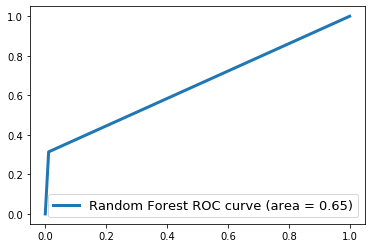

In [82]:
y_predict_randomf = randomf_clf.predict(X_test)
generate_report(y_predict_randomf, 'Random Forest')

## Logistic Regression

               precision    recall  f1-score   support

fine not paid       0.93      1.00      0.97     48938
    fine paid       0.84      0.10      0.18      3822

     accuracy                           0.93     52760
    macro avg       0.89      0.55      0.57     52760
 weighted avg       0.93      0.93      0.91     52760

[[48867    71]
 [ 3446   376]]
area under ROC curve is:  0.5484634986730933


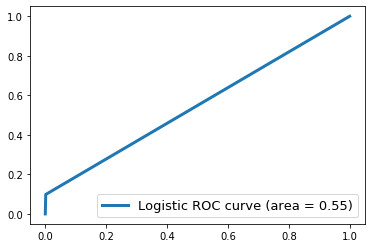

In [45]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression().fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)
generate_report(y_pred_log, 'Logistic')

## Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators =  100, max_depth = 30).fit(X_train, y_train)
y_pred_reg_rf = reg_rf.predict(X_test)


area under ROC curve is:  0.7957932637841034


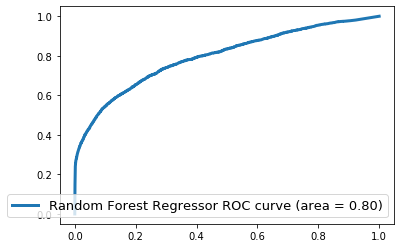

In [106]:
fpr, tpr, _ = roc_curve(y_test, y_pred_reg_rf) #ROC curve
roc_auc = auc(fpr, tpr) # Area ROC curve
plt.plot(fpr, tpr, lw=3, label='{} ROC curve (area = {:0.2f})'.format('Random Forest Regressor', roc_auc))
plt.legend(loc='lower right', fontsize=13)
print('area under ROC curve is: ', roc_auc)

In [116]:
pd.DataFrame(y_pred_reg_rf).sort_values(by = 0, ascending=False).head(30)
X_test.iloc[26896]

fine_amount             200.000000
late_fee                  0.000000
discount_amount           0.000000
judgment_amount         230.000000
lat                      42.432325
lon                     -83.099867
disposition_category      3.000000
violation_category       45.000000
Name: 153100, dtype: float64